In [1]:
setwd('/import/DB/zhang//data')

In [2]:
sce = readRDS('OS.final.rds')

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)



In [4]:
library(Seurat)

Warning message:
"package 'Seurat' was built under R version 4.2.3"
Attaching SeuratObject




  Adipocyte        BMSC        MSCs         OBs         OS1         OS2 
       1894        1716        3359        2909        4928        4448 
chondrocyte 
        290 


     OS control 
  12788    1213 

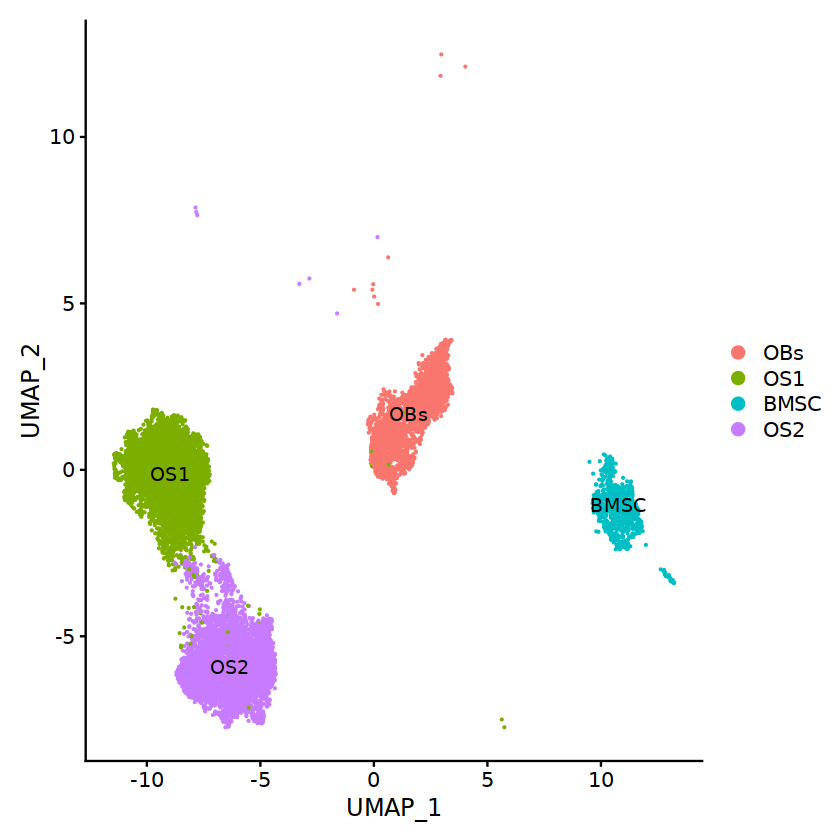

In [5]:
Idents(sce) = 'celltype'
table(sce$celltype)
sce  = subset(sce,idents = c('OBs','OS1','OS2','BMSC'))
library(Seurat)
Idents(sce) = 'group'
table(sce$group)
sce = subset(sce,idents = 'OS')
Idents(sce) = 'celltype'
DimPlot(sce,label = T,reduction = 'umap')

In [6]:
library(Seurat)

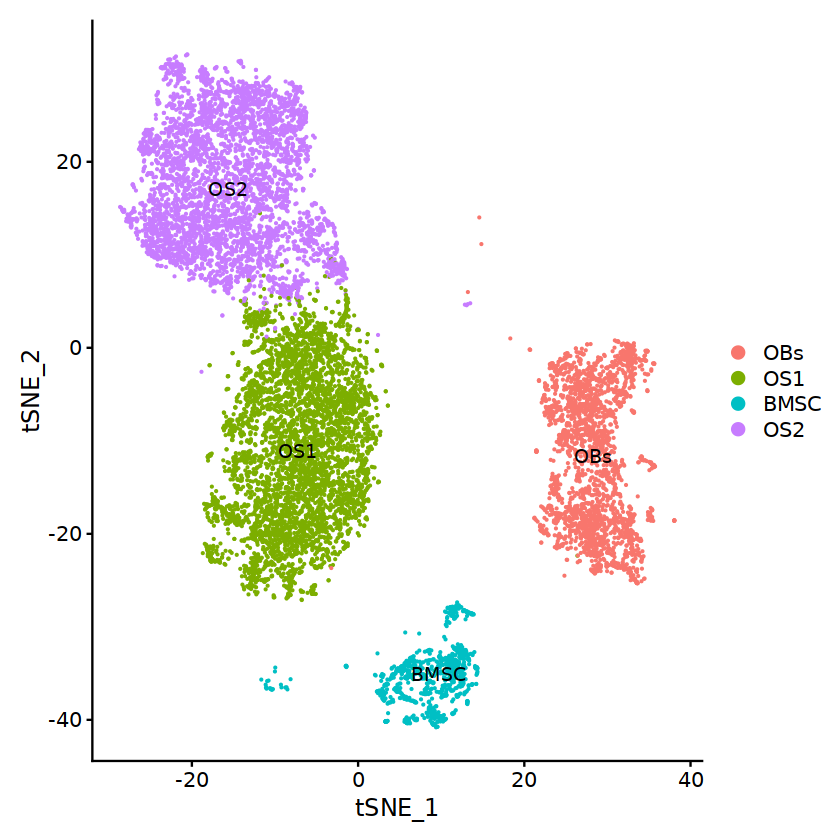

In [7]:
DimPlot(sce,reduction = 'tsne',label = T)

In [8]:
Idents(sce) = 'celltype'

In [9]:
library(CytoTRACE)

Welcome to the CytoTRACE R package, a tool for the unbiased prediction of differentiation states in scRNA-seq data. For more information about this method, visit https://cytotrace.stanford.edu.


Warning message:
"The ScanoramaCT python module is not accessible. The iCytoTRACE function for integration across multiple datasets will be disabled. Please follow the instructions in https://github.com/gunsagargulati/CytoTRACE to install the necessary Python packages for this application."


In [19]:
#  https://www.jianshu.com/p/0f1e5479e72f   cytotrace 完全颠倒的原因

In [10]:
marrow_10x_expr  = as.matrix(sce@assays$RNA@counts)
marrow_10x_pheno <- sce$celltype
marrow_10x_pheno = as.character(marrow_10x_pheno)
names(marrow_10x_pheno) <- rownames(sce@meta.data)

Warning message in asMethod(object):
"sparse->dense coercion: allocating vector of size 2.1 GiB"


In [13]:
results = CytoTRACE(marrow_10x_expr, 
	ncores = 35, subsamplesize = 1000)
length(results)  # 8

The number of cells in your dataset exceeds 3,000. CytoTRACE will now be run in fast mode (see documentation). You can multi-thread this run using the 'ncores' flag. To disable fast mode, please indicate 'enableFast = FALSE'.

Warning message in CytoTRACE(marrow_10x_expr, ncores = 35, subsamplesize = 1000):
"431 genes have zero expression in the matrix and were filtered"
CytoTRACE will be run on 13 sub-sample(s) of approximately 984 cells each using 13 / 35 core(s)

Pre-processing data and generating similarity matrix...

Calculating gene counts signature...

Smoothing values with NNLS regression and diffusion...

Calculating genes associated with CytoTRACE...

Done



[1] 8

In [14]:
options(repr.plot.width = 9)

Running t-SNE. To use your own coordinates, use the 'emb' flag.



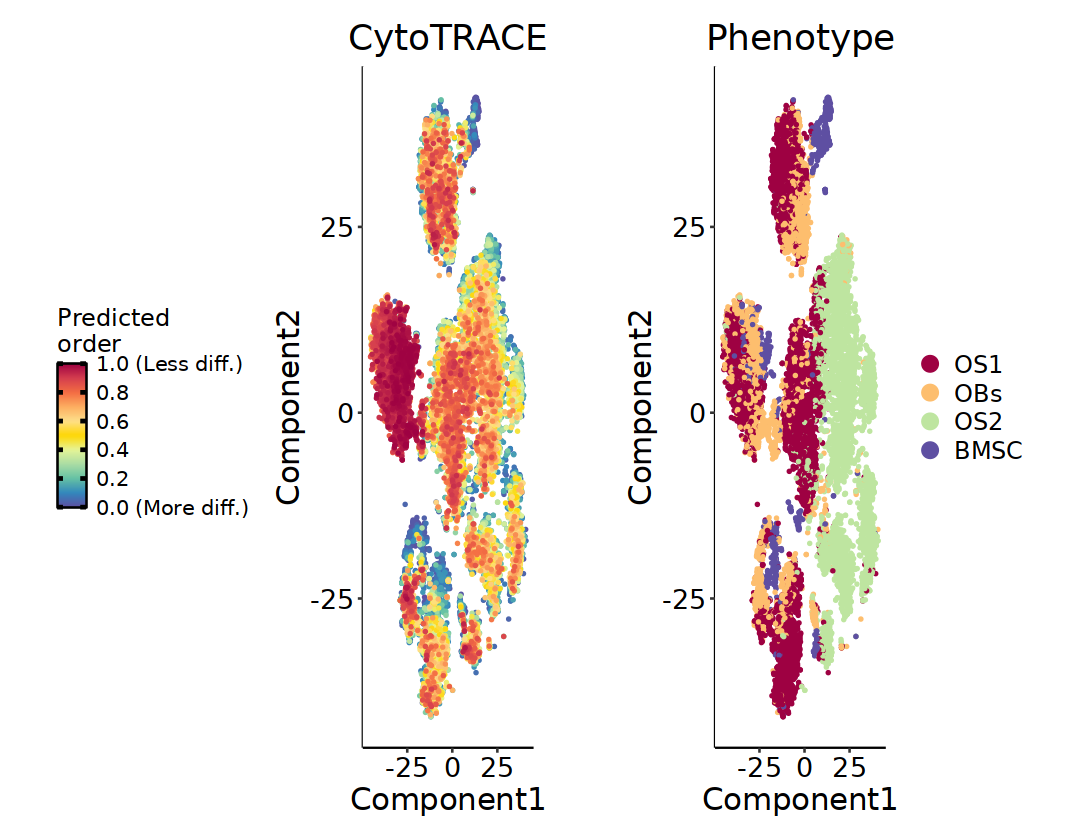

In [15]:
plotCytoTRACE(
	cyto_obj = results, 
	phenotype = marrow_10x_pheno, #细胞类型注释
	# gene = "Kit",  #是否映射特定基因表达
	emb = NULL,      #是否提供细胞降维坐标
	outputDir = "./" #图片储存路径
)

In [16]:
getwd()

[1] "/import/DB/zhang/data"